# Dataset: NYC taxi timings & weather report

Business Questions:
/change the questions into objectives
1)	Tool- How does the average travel duration affect by amount of precipitation? 
2)	Tool- How does the average travel distance affect by the amount of precipitation? 
3)	Tool- How is the trip duration affected by average temperatures? 
4)	Decision making- What is the ideal distance of travel to maximize the number of passengers per hour in rush hour? 
The decision will take its place while optimizing the number of taxis during the rush hours. The dision maker could be the general manager of the taxi station.

Measurable Target:
1. 

In [1]:
import pandas as pd
import numpy as np
import IPython.display as display
import matplotlib.pyplot as plt 
import datetime
import seaborn as sns 
%matplotlib inline 
from sklearn.model_selection import train_test_split   # This is to prepare the data for the model
from sklearn.tree import DecisionTreeClassifier 

In [2]:
# Read in the CSV file and convert "T" to NaN   
df=pd.read_csv(r'refined_data.csv',index_col='Unnamed: 0',na_values="T")

Let's see the data 

In [3]:
df.head()

,year,month,date,hour,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,avg_temp,snow_depth,snow_fall,precipitate,distance
0,2016,3,2016-03-14,17,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,45.5,0.0,0.0,0.29,17.679539
1,2016,6,2016-06-12,0,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,72.5,0.0,0.0,0.00,20.455904
2,2016,4,2016-04-06,19,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,39.0,0.0,0.0,0.00,13.438206
3,2016,3,2016-03-26,13,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,46.5,0.0,0.0,0.00,10.689569
4,2016,1,2016-01-30,22,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,33.5,6.0,0.0,0.00,11.572403


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 0 to 944
Data columns (total 20 columns):
year                  945 non-null int64
month                 945 non-null int64
date                  945 non-null object
hour                  945 non-null int64
id                    945 non-null object
vendor_id             945 non-null int64
pickup_datetime       945 non-null object
dropoff_datetime      945 non-null object
passenger_count       945 non-null int64
pickup_longitude      945 non-null float64
pickup_latitude       945 non-null float64
dropoff_longitude     945 non-null float64
dropoff_latitude      945 non-null float64
store_and_fwd_flag    945 non-null object
trip_duration         945 non-null int64
avg_temp              945 non-null float64
snow_depth            910 non-null float64
snow_fall             887 non-null float64
precipitate           882 non-null float64
distance              945 non-null float64
dtypes: float64(9), int64(6), object(5)
memory usage

There are some Nans as we saw from the beginning, Now we know which columns specifically
After replacing all the "T" to NaN- showing a df of all the rows that contains Ts


In [5]:
nan_df=df[df.isnull().any(axis=1)]

In [6]:
nan_df.count()

year                  135
month                 135
date                  135
hour                  135
id                    135
vendor_id             135
pickup_datetime       135
dropoff_datetime      135
passenger_count       135
pickup_longitude      135
pickup_latitude       135
dropoff_longitude     135
dropoff_latitude      135
store_and_fwd_flag    135
trip_duration         135
avg_temp              135
snow_depth            100
snow_fall              77
precipitate            72
distance              135
dtype: int64

copying only the columns that contain Nans <br>
using mode() finding the most frequent value in these columns

In [7]:
nan_only=nan_df[['snow_depth','snow_fall','precipitate']].copy()
nan_only.mode()

,snow_depth,snow_fall,precipitate
0,0.0,0.0,0.0


fill NaN with the most frequent value of each column

In [8]:
df = df.fillna(value = 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 0 to 944
Data columns (total 20 columns):
year                  945 non-null int64
month                 945 non-null int64
date                  945 non-null object
hour                  945 non-null int64
id                    945 non-null object
vendor_id             945 non-null int64
pickup_datetime       945 non-null object
dropoff_datetime      945 non-null object
passenger_count       945 non-null int64
pickup_longitude      945 non-null float64
pickup_latitude       945 non-null float64
dropoff_longitude     945 non-null float64
dropoff_latitude      945 non-null float64
store_and_fwd_flag    945 non-null object
trip_duration         945 non-null int64
avg_temp              945 non-null float64
snow_depth            945 non-null float64
snow_fall             945 non-null float64
precipitate           945 non-null float64
distance              945 non-null float64
dtypes: float64(9), int64(6), object(5)
memory usage

Now we have no Nans in the df. <br>
The data frame contains: <br>
945 entries X 20 columns: 15 numeric, 5 obects

The trip duration column is in seconds. replacing it to minutes because it is more relevant to this kind of data (taxi trips)

In [10]:
df['trip_duration']=df['trip_duration']/60

<b>Changing the column names</b><br>
The data came from US- the unit of measurement is in inch\mile\F degree etc.

In [11]:
df.rename(columns={'trip_duration':'trip_duration(min)','snow_depth':'snow_depth(inch)',
                       'avg_temp':'avg_temp(F)','distance':'distance(mile)'},inplace=True)

In [12]:
df.describe().round(3)

,year,month,hour,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration(min),avg_temp(F),snow_depth(inch),snow_fall,precipitate,distance(mile)
count,945.0,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000
mean,2016.0,3.577,13.706,1.531,1.671,-73.976,40.752,-73.974,40.753,12.157,51.727,0.411,0.123,0.097,29.271
std,0.0,1.708,6.378,0.499,1.299,0.033,0.026,0.032,0.030,7.091,16.187,2.412,1.553,0.269,28.134
min,2016.0,1.000,0.000,1.000,1.000,-74.017,40.641,-74.178,40.577,0.050,7.000,0.000,0.000,0.000,0.000
25%,2016.0,2.000,9.000,1.000,1.000,-73.992,40.740,-73.991,40.735,6.683,39.500,0.000,0.000,0.000,12.623
50%,2016.0,4.000,14.000,2.000,1.000,-73.982,40.755,-73.979,40.756,10.700,52.000,0.000,0.000,0.000,20.034
75%,2016.0,5.000,19.000,2.000,2.000,-73.967,40.768,-73.962,40.771,16.233,64.000,0.000,0.000,0.040,35.902
max,2016.0,6.000,23.000,2.000,6.000,-73.777,40.850,-73.782,40.886,33.133,81.500,22.000,27.300,2.310,230.143


In [13]:
df.dtypes

year                    int64
month                   int64
date                   object
hour                    int64
id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration(min)    float64
avg_temp(F)           float64
snow_depth(inch)      float64
snow_fall             float64
precipitate           float64
distance(mile)        float64
dtype: object

make a df for the object features

In [14]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,date,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,2016-03-14,id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,N
1,2016-06-12,id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,N
2,2016-04-06,id3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,N
3,2016-03-26,id2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,N
4,2016-01-30,id0801584,2016-01-30 22:01:40,2016-01-30 22:09:03,N


Action: <br> 
1. Split the Day value out from the Date <br>
2. leave the times in the same format <br>

store_and_fwd_flag explanation- <br> 
This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server

In [15]:
obj_df['pickup_datetime'] = pd.to_datetime(obj_df['pickup_datetime'], format = '%Y/%m/%d')
obj_df['day'] = obj_df['pickup_datetime'].dt.day
df.insert(loc = 2, column = 'day', value = int, allow_duplicates = True)
df['day'] = obj_df['day']
df.head()


,year,month,day,date,hour,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,...,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration(min),avg_temp(F),snow_depth(inch),snow_fall,precipitate,distance(mile)
0,2016,3,14,2016-03-14,17,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,...,40.767937,-73.964630,40.765602,N,7.583333,45.5,0.0,0.0,0.29,17.679539
1,2016,6,12,2016-06-12,0,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,...,40.738564,-73.999481,40.731152,N,11.050000,72.5,0.0,0.0,0.00,20.455904
2,2016,4,6,2016-04-06,19,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,...,40.719971,-74.012268,40.706718,N,7.150000,39.0,0.0,0.0,0.00,13.438206
3,2016,3,26,2016-03-26,13,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,...,40.793209,-73.972923,40.782520,N,7.250000,46.5,0.0,0.0,0.00,10.689569
4,2016,1,30,2016-01-30,22,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,...,40.742195,-73.992081,40.749184,N,7.383333,33.5,6.0,0.0,0.00,11.572403


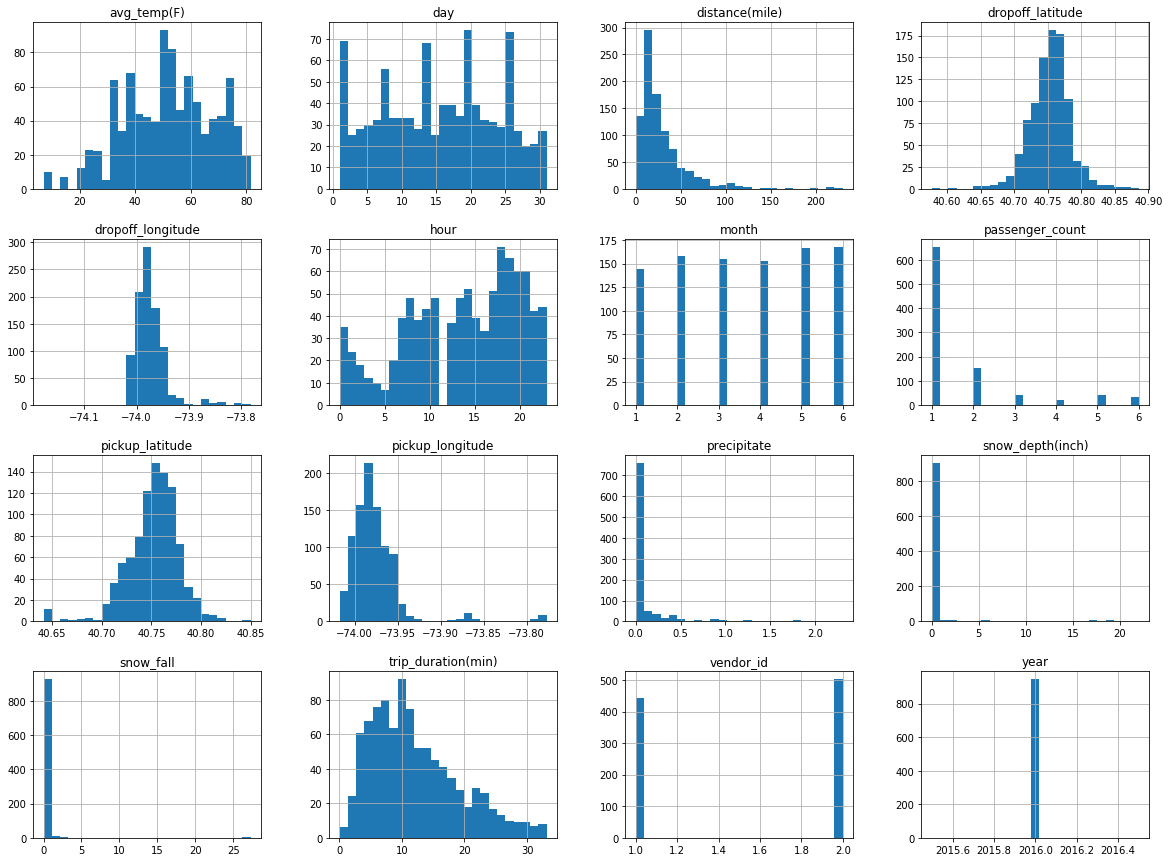

In [16]:
df.hist(bins = 25, figsize = (20,15))
plt.show()

C:\Users\Peleg\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


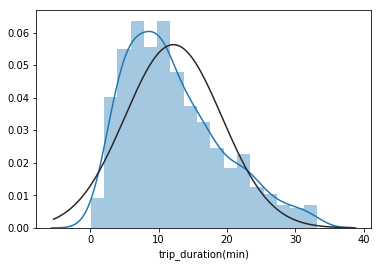

In [17]:
from scipy.stats import norm 
import seaborn as sns
sns.distplot(df["trip_duration(min)"], fit=norm)

C:\Users\Peleg\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


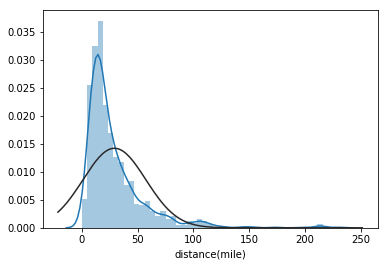

In [55]:
sns.distplot(df["distance(mile)"], fit=norm)


Normal distribution with left border=0

C:\Users\Peleg\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


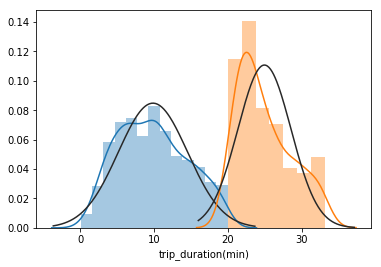

In [18]:
#spliting data trip duration
duration_norm_big = df[df["trip_duration(min)"] <= 20] 
duration_norm_small = df[df["trip_duration(min)"] >= 20] 
sns.distplot(duration_norm_big["trip_duration(min)"], fit=norm)
sns.distplot(duration_norm_small["trip_duration(min)"], fit=norm)

On the same variable we got 2 splits that give two normal curves

<b>Clip numbers of the avg_temp(F)</b><br>
clipping the left and right values- focusing on 30F-80F

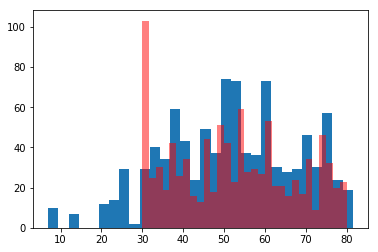

In [19]:
temptrature = np.clip(df['avg_temp(F)'], 30, 80 ) 
plt.hist(df['avg_temp(F)'], bins=30)
plt.hist(temptrature, bins=30, color='red', alpha = 0.5)
plt.show()

<b>Finding correlations using scatter plots</b>

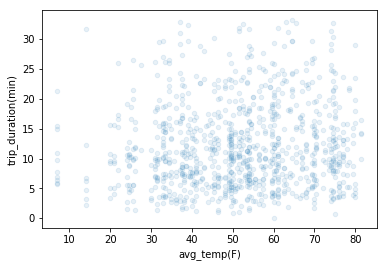

In [20]:
df.plot(kind="scatter", x="avg_temp(F)", y="trip_duration(min)", alpha=0.1)

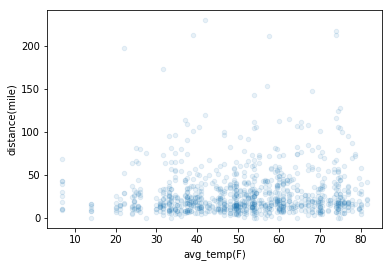

In [21]:
df.plot(kind="scatter", x="avg_temp(F)", y="distance(mile)", alpha=0.1)

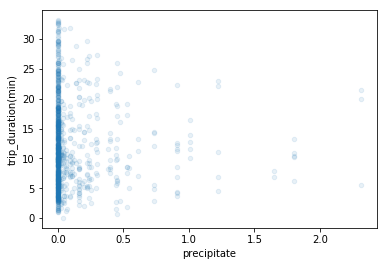

In [22]:
df.precipitate = pd.to_numeric(df['precipitate'], errors='coerce')
df.plot(kind="scatter", x="precipitate", y="trip_duration(min)", alpha=0.1)

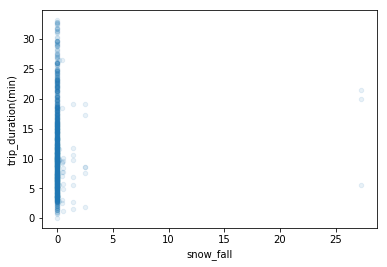

In [23]:
df.plot(kind="scatter", x="snow_fall", y="trip_duration(min)", alpha=0.1)

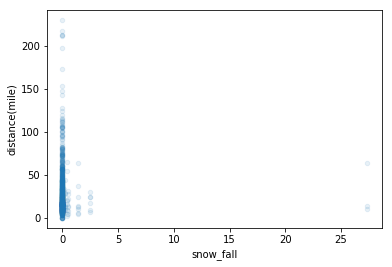

In [24]:
df.plot(kind="scatter", x="snow_fall", y="distance(mile)", alpha=0.1)

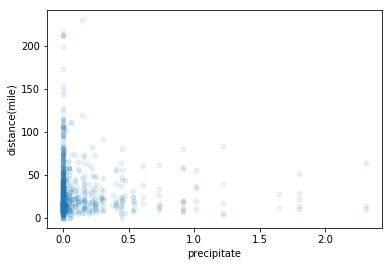

In [25]:
df.plot(kind="scatter", x="precipitate", y="distance(mile)", alpha=0.1)

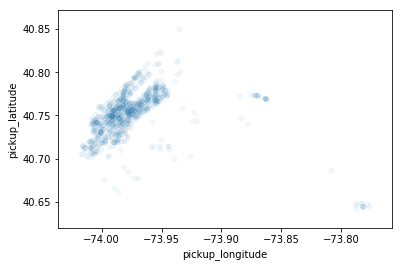

In [26]:
df.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", alpha=0.05)

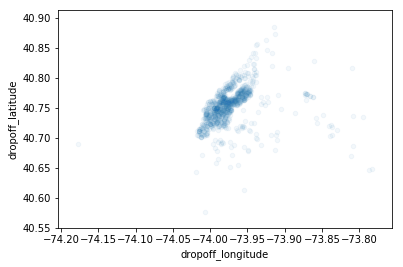

In [27]:
df.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude", alpha=0.05)

In [28]:
df['distance(mile)'].astype(float)
corr_matrix = df.corr()
corr_matrix["distance(mile)"].sort_values(ascending=False)

distance(mile)        1.000000
trip_duration(min)    0.645391
pickup_longitude      0.367372
dropoff_longitude     0.307541
month                 0.094645
avg_temp(F)           0.077334
snow_depth(inch)     -0.002702
snow_fall            -0.007577
passenger_count      -0.024312
precipitate          -0.024506
hour                 -0.029539
vendor_id            -0.029787
day                  -0.035402
dropoff_latitude     -0.060355
pickup_latitude      -0.191257
year                       NaN
Name: distance(mile), dtype: float64

In [29]:
df['distance(mile)'].astype(float)
corr_matrix = df.corr()
corr_matrix["distance(mile)"].sort_values(ascending=False)
corr_matrix
df['distance(mile)'].corr(df['trip_duration(min)'])

0.6453911645022783

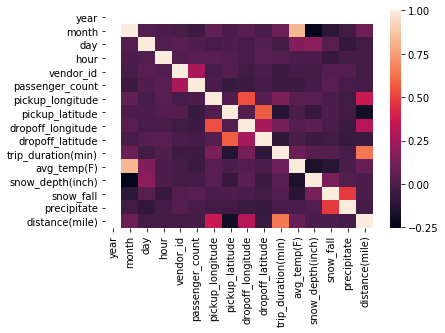

In [30]:
sns.heatmap(corr_matrix)

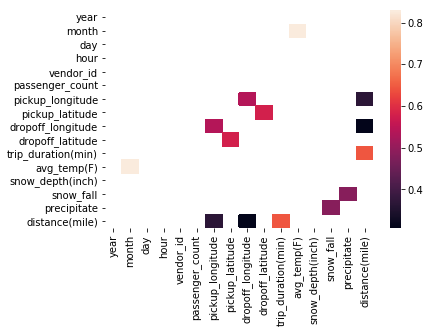

In [31]:
sns.heatmap(corr_matrix[(corr_matrix<1) & ((corr_matrix >= 0.3) | (corr_matrix <= -0.3)) ] )

In [32]:
#Transform the data to matrix of X and y

# 1. Split between X the predictors and y the target
y = df['vendor_id']
X = df.drop('vendor_id', axis=1)

# 2. Turn from data frame to matrix: no indexes, number only
X = X.values  # X is a matrix of size 20 * 810
y = y.values  # y is a matrix of size 1 * 810, therefore it is a vector

# 3. Split X and y togather to train data set 80% and test data set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify = y) 

In [33]:
print( 'df type is: ', type(df), '  and X_train type is: ', type(X_train))

df type is:  <class 'pandas.core.frame.DataFrame'>   and X_train type is:  <class 'numpy.ndarray'>


In [34]:
# select a model
tree_class = DecisionTreeClassifier()

In [35]:
tree_class.fit(X_train, y_train)

ValueError: could not convert string to float: 'N'

In [ ]:
#Model evaluation
tree_class.score(X=X_test, y=y_test) 

In [ ]:
tree_class.score(X=X_train, y=y_train) 

In [ ]:
#Predict / Deploy model
example = X_test[7:10,]
example

In [ ]:
predicted_y = tree_class.predict(X=example)
predicted_y

In [ ]:
y_test[7:10,]

## Heatmap Module 

In [ ]:
!pip install folium
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
## Pickup Data
nyc_map_pickup = folium.Map([40.7306,-73.935242], zoom_start=11)

for index, row in df.iterrows():
    folium.CircleMarker([row['pickup_latitude'], row['pickup_longitude']],
                        radius=1,
                        fill=True,
                        fill_color="blue", 
                        fill_opacity=0.005,
                       )#.add_to(nyc_map) if you want to add points/markers to the map - does not look well with heatmaps

In [ ]:
# convert to (n, 2) nd-array format for heatmap
pickupArr = df[['pickup_latitude', 'pickup_longitude']].as_matrix()

# plot heatmap
nyc_map_pickup.add_child(plugins.HeatMap(pickupArr, radius=15))


In [ ]:
## Dropoff Data
nyc_map_dropoff = folium.Map([40.7306,-73.935242], zoom_start=11)

for index, row in df.iterrows():
    folium.CircleMarker([row['dropoff_latitude'], row['dropoff_longitude']],
                        radius=1,
                        fill=True,
                        fill_color="blue", 
                        fill_opacity=0.005,
                       )#.add_to(nyc_map) if you want to add points/markers to the map - does not look well with heatmaps

In [ ]:
dropoffArr = df[['dropoff_latitude', 'dropoff_longitude']].as_matrix()

# plot heatmap
nyc_map_dropoff.add_child(plugins.HeatMap(dropoffArr, radius=15))